In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('test.csv')
print(df.shape)
print(df.head())

(1459, 80)
     Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0    

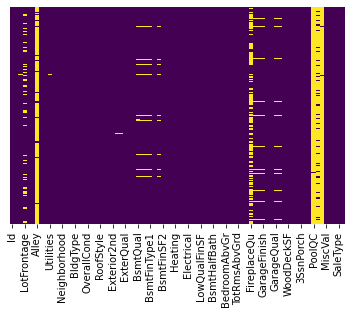

In [4]:
#check null values
df.isnull().sum()
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [5]:
## Fill Missing Values
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())
df['MSZoning']=df['MSZoning'].fillna(df['MSZoning'].mode()[0])
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea']= df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])

df.drop(['Alley'],axis=1,inplace=True)
df.drop(['GarageYrBlt'],axis=1,inplace=True)
df.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)
df.drop(['Id'],axis=1,inplace=True)


print(df.loc[:, df.isnull().any()].head())
df['Utilities']=df['Utilities'].fillna(df['Utilities'].mode()[0])
df['Exterior1st']=df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
df['Exterior2nd']=df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])
df['BsmtFinType1']=df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df['BsmtFinSF1']=df['BsmtFinSF1'].fillna(df['BsmtFinSF1'].mean())
df['BsmtFinSF2']=df['BsmtFinSF2'].fillna(df['BsmtFinSF2'].mean())
df['BsmtUnfSF']=df['BsmtUnfSF'].fillna(df['BsmtUnfSF'].mean())
df['TotalBsmtSF']=df['TotalBsmtSF'].fillna(df['TotalBsmtSF'].mean())
df['BsmtFullBath']=df['BsmtFullBath'].fillna(df['BsmtFullBath'].mode()[0])
df['BsmtHalfBath']=df['BsmtHalfBath'].fillna(df['BsmtHalfBath'].mode()[0])
df['KitchenQual']=df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])
df['Functional']=df['Functional'].fillna(df['Functional'].mode()[0])
df['GarageCars']=df['GarageCars'].fillna(df['GarageCars'].mean())
df['GarageArea']=df['GarageArea'].fillna(df['GarageArea'].mean())
df['SaleType']=df['SaleType'].fillna(df['SaleType'].mode()[0])

  Utilities Exterior1st Exterior2nd BsmtFinType1  BsmtFinSF1  BsmtFinSF2  \
0    AllPub     VinylSd     VinylSd          Rec       468.0       144.0   
1    AllPub     Wd Sdng     Wd Sdng          ALQ       923.0         0.0   
2    AllPub     VinylSd     VinylSd          GLQ       791.0         0.0   
3    AllPub     VinylSd     VinylSd          GLQ       602.0         0.0   
4    AllPub     HdBoard     HdBoard          ALQ       263.0         0.0   

   BsmtUnfSF  TotalBsmtSF  BsmtFullBath  BsmtHalfBath KitchenQual Functional  \
0      270.0        882.0           0.0           0.0          TA        Typ   
1      406.0       1329.0           0.0           0.0          Gd        Typ   
2      137.0        928.0           0.0           0.0          TA        Typ   
3      324.0        926.0           0.0           0.0          Gd        Typ   
4     1017.0       1280.0           0.0           0.0          Gd        Typ   

   GarageCars  GarageArea SaleType  
0         1.0       730.0

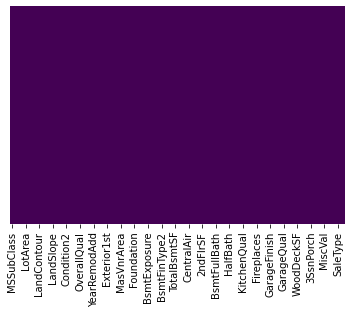

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [7]:
# Import label encoder
from sklearn import preprocessing
 # label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

df['MSZoning']= label_encoder.fit_transform(df['MSZoning'])
df['Street']= label_encoder.fit_transform(df['Street'])
df['LotShape']= label_encoder.fit_transform(df['LotShape'])
df['LandContour']= label_encoder.fit_transform(df['LandContour'])
df['Utilities']= label_encoder.fit_transform(df['Utilities'])
df['LotConfig']= label_encoder.fit_transform(df['LotConfig'])
df['LandSlope']= label_encoder.fit_transform(df['LandSlope'])
df['Neighborhood']= label_encoder.fit_transform(df['Neighborhood'])
df['Condition2']= label_encoder.fit_transform(df['Condition2'])
df['BldgType']= label_encoder.fit_transform(df['BldgType'])
df['Condition1']= label_encoder.fit_transform(df['Condition1'])
df['HouseStyle']= label_encoder.fit_transform(df['HouseStyle'])
df['SaleType']= label_encoder.fit_transform(df['SaleType'])
df['SaleCondition']= label_encoder.fit_transform(df['SaleCondition'])
df['ExterCond']= label_encoder.fit_transform(df['ExterCond'])
df['ExterQual']= label_encoder.fit_transform(df['ExterQual'])
df['Foundation']= label_encoder.fit_transform(df['Foundation'])
df['BsmtQual']= label_encoder.fit_transform(df['BsmtQual'])
df['BsmtCond']= label_encoder.fit_transform(df['BsmtCond'])
df['BsmtExposure']= label_encoder.fit_transform(df['BsmtExposure'])
df['BsmtFinType1']= label_encoder.fit_transform(df['BsmtFinType1'])
df['BsmtFinType2']= label_encoder.fit_transform(df['BsmtFinType2'])
df['RoofStyle']= label_encoder.fit_transform(df['RoofStyle'])
df['RoofMatl']= label_encoder.fit_transform(df['RoofMatl'])
df['Exterior1st']= label_encoder.fit_transform(df['Exterior1st'])
df['Exterior2nd']= label_encoder.fit_transform(df['Exterior2nd'])
df['MasVnrType']= label_encoder.fit_transform(df['MasVnrType'])
df['Heating']= label_encoder.fit_transform(df['Heating'])
df['HeatingQC']= label_encoder.fit_transform(df['HeatingQC'])
df['CentralAir']= label_encoder.fit_transform(df['CentralAir'])
df['Electrical']= label_encoder.fit_transform(df['Electrical'])
df['KitchenQual']= label_encoder.fit_transform(df['KitchenQual'])
df['Functional']= label_encoder.fit_transform(df['Functional'])
df['FireplaceQu']= label_encoder.fit_transform(df['FireplaceQu'])
df['GarageType']= label_encoder.fit_transform(df['GarageType'])
df['GarageFinish']= label_encoder.fit_transform(df['GarageFinish'])
df['GarageQual']= label_encoder.fit_transform(df['GarageQual'])
df['GarageCond']= label_encoder.fit_transform(df['GarageCond'])
df['PavedDrive']= label_encoder.fit_transform(df['PavedDrive'])


In [8]:
df.to_csv('formulatedtest.csv',index=False)